In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",header=None)

In [3]:
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style",
          "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type",
          "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
          "peak-rpm", "city-mpg", "highway-mpg", "price"]
df.columns = headers
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)
df["price"] = df["price"].astype(int)

In [14]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


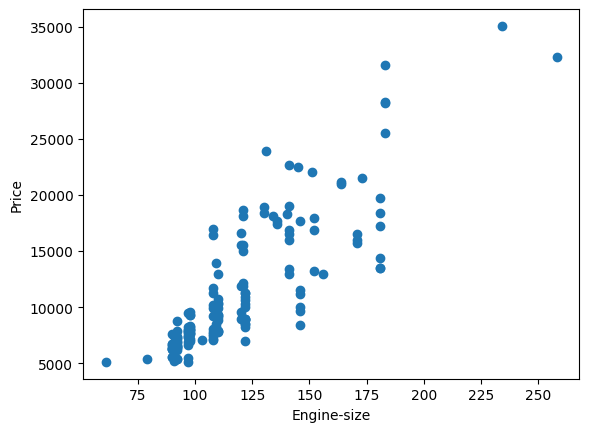

In [4]:
plt.scatter(df["engine-size"],df["price"])
plt.xlabel("Engine-size")
plt.ylabel("Price")
plt.show()

In [5]:
x=df[["engine-size"]]
y=df["price"]

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [7]:
lr= LinearRegression()

In [8]:
lr.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
X_test

,engine-size
22,90
8,131
199,130
12,164
170,146
175,122
101,181
185,109
40,110
178,171


In [10]:
Y_test

22      6377
8      23875
199    18950
12     20970
170    11199
175     9988
101    13499
185     8195
40     10295
178    16558
168     9639
154     7898
179    15998
119     7957
67     25552
72     35056
11     16925
35      7295
34      7129
81      8499
62     10245
52      6795
141     7126
64     11245
36      7295
173     8948
95      7799
135    15510
133    12170
6      17710
167     8449
177    11248
Name: price, dtype: int64

In [11]:
y_pred =lr.predict([X_test.iloc[0]])

C:\Users\chirag tomar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
y_pred

array([6664.66989878])

In [13]:
y_pred1=lr.predict(X_test)
y_pred1

array([ 6664.66989878, 13433.11846852, 13268.03435706, 18880.89414661,
       15909.38014038, 11947.36146541, 21687.32404138,  9801.26801646,
        9966.35212792, 20036.48292681, 15909.38014038,  6994.83812169,
       20036.48292681,  7985.34279043, 22017.49226429, 30436.78194861,
        9636.18390501,  6994.83812169,  6994.83812169, 11947.36146541,
       11947.36146541,  6829.75401023,  9636.18390501, 11947.36146541,
        6994.83812169, 11947.36146541,  7820.25867898, 11782.27735395,
       11782.27735395, 14258.53902581, 15909.38014038, 11947.36146541])

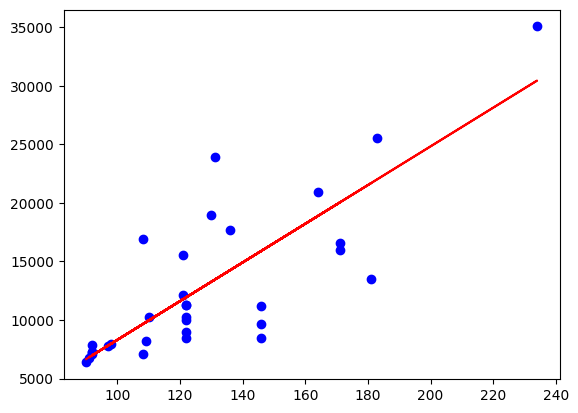

In [14]:
plt.scatter(X_test,Y_test,color="blue")
plt.plot(X_test,y_pred1,color="red")

In [15]:
 y_train_pred = lr.predict(X_train)
 y_test_pred = lr.predict(X_test)

In [16]:
X_line = np.linspace(x.min(),x.max(),200).reshape(-1,1)

C:\Users\chirag tomar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


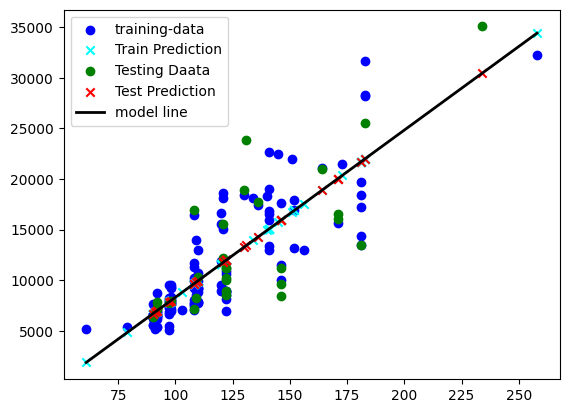

Text(0, 0.5, 'Car Price')

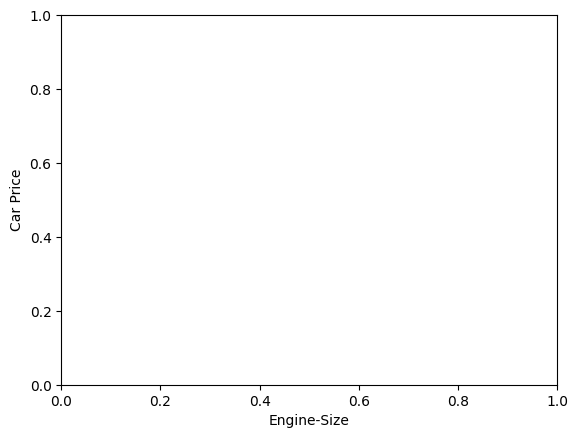

In [23]:
plt.scatter(X_train,Y_train,color="blue",label="training-data")
plt.scatter(X_train,y_train_pred,color="cyan",marker="x",label="Train Prediction")
plt.scatter(X_test,Y_test,color="green",label="Testing Daata")
plt.scatter(X_test,y_test_pred,color="red",marker="x",label="Test Prediction")
plt.plot(X_line,lr.predict(X_line),color="black",linewidth=2,label="model line")
plt.legend()
plt.show()
plt.xlabel("Engine-Size")
plt.ylabel("Car Price")

In [22]:
print(r2_score(Y_train,y_train_pred))
print(r2_score(Y_test,y_test_pred))

0.7322061710864944
0.6208518590656298


# Ridge Regression

In [25]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.0001)
R.fit(X_train,Y_train)

,alpha,0.0001
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [26]:
y_rid_pred = R.predict(X_test)

In [27]:
print(r2_score(Y_test,y_rid_pred))

0.6208518591585069
